In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
!pip install torch torchvision torchaudio
!pip install opencv-python opencv-python-headless
!pip install matplotlib
!pip install pycocotools

In [5]:
!pip install ultralytics opencv-python-headless matplotlib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 19.5 MB/s eta 0:00:00


In [1]:
import json
import os
import cv2
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [5]:
json_file = json.load(open('123/datasets/error_det/label_train.json'))
images = os.listdir('123/datasets/error_det/images-origin')

In [5]:
import os
import cv2
from tqdm import tqdm

def process_image(item, num, images):
    img_name = item['id']
    img_box = item['region']
    img_path = os.path.join('123/datasets/error_det/images-origin', img_name)
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    cv2.imwrite(f'123/datasets/error_det/images/train/{num:06d}.png', img)
    return img_box, h, w

def write_labels(img_box, h, w, num):
    with open(f'123/datasets/error_det/labels/train/{num:06d}.txt', 'w') as f:
        text = []
        for box in img_box:
            x1, y1, x2, y2 = box
            x1, y1, x2, y2 = x1 / w, y1 / h, x2 / w, y2 / h
            width, height = abs(x1 - x2), abs(y1 - y2)
            x, y = x1 + width / 2, y1 + height / 2
            text.append(' '.join(map(str, [0, x, y, width, height])))
        f.writelines('\n'.join(text))

for num, item in tqdm(enumerate(json_file), total=len(images)):
    img_box, h, w = process_image(item, num, images)
    write_labels(img_box, h, w, num)

100%|██████████| 13000/13000 [03:26<00:00, 62.95it/s] 


In [6]:

from ultralytics import YOLO
model = YOLO("123/yolov8x.yaml")
model = YOLO("yolov8x.pt")
augmentation_config = {
    'degrees': 10.0,
    'translate': 0.1,
    'scale': 0.5,
    'shear': 2.0,
    'perspective': 0.0,
    'flipud': 0.0,
    'fliplr': 0.5,
    'hsv_h': 0.015,
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'mixup': 0.0,
    'mosaic': 1.0
}
model.train(
    data='123/datasets/error_det/error_det.yaml',
    epochs=50,
    batch=16,
    imgsz=640,
    augment=True,  # 启用数据增强
    **augmentation_config
)

Ultralytics 8.3.55 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA A10, 22732MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=123/datasets/error_det/error_det.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train29, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /mnt/workspace/123/datasets/error_det/labels/train.cache... 13000 images, 7359 backgrounds, 0 corrupt: 100%|██████████| 13000/13000 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /mnt/workspace/123/datasets/error_det/val_images.cache... 0 images, 1200 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /mnt/workspace/123/datasets/error_det/val_images.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/train29/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train29
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      14.2G      1.604      3.641      1.436          6        640: 100%|██████████| 813/813 [06:44<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.9G      1.499      2.333      1.348          5        640: 100%|██████████| 813/813 [06:39<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      14.2G       1.69      2.609      1.494          4        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      14.2G      1.768      2.803      1.596          7        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.9G       1.67      2.586       1.55         10        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      14.2G      1.613      2.432      1.517          7        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      14.2G      1.546      2.274      1.459          9        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      14.2G      1.478      2.148      1.438          5        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.9G      1.456      2.096      1.415          7        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      14.2G      1.435      2.018      1.397          5        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      14.2G      1.399      1.916      1.376          3        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      14.2G       1.38      1.893      1.366         10        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.9G      1.354      1.803      1.346          6        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      14.2G      1.317      1.745       1.33          5        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      14.2G      1.308      1.695      1.316          5        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      14.2G      1.295      1.631      1.304         12        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      13.9G      1.287      1.634      1.291          2        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      14.2G      1.262      1.551      1.285          6        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      14.2G      1.256      1.551       1.28          8        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      14.2G       1.23       1.48      1.261          5        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      13.9G      1.211      1.444      1.265          8        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      14.2G      1.204       1.42      1.242          3        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      14.2G      1.186      1.374      1.238          6        640: 100%|██████████| 813/813 [06:35<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      14.2G      1.169       1.32      1.226          8        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.9G      1.158      1.319      1.217          1        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      14.2G      1.137      1.277      1.204          7        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      14.2G      1.134      1.223      1.197          6        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      14.2G      1.115      1.211      1.191          4        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.9G      1.101      1.193      1.185          5        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      14.2G      1.096      1.148      1.183          8        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      14.2G      1.071      1.132      1.166         12        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      14.2G      1.064      1.097      1.159          5        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.9G      1.057      1.096      1.157          3        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      14.2G      1.031      1.056       1.13          5        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      14.2G      1.032      1.027      1.149          6        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      14.2G      1.015     0.9922      1.134          7        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.9G     0.9957     0.9522      1.114          6        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.07it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      14.2G      1.002     0.9362       1.12          6        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      14.2G     0.9887      0.941      1.109          6        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.07it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      14.2G     0.9797     0.9068      1.108          8        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.07it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.9G     0.9274     0.8176      1.083          1        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      14.2G     0.9138     0.7818      1.075          4        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      14.2G     0.8896     0.7731      1.061          5        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.07it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      14.2G     0.8947     0.7379      1.062          3        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.07it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.9G     0.8702     0.7151      1.048          4        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.07it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      14.2G     0.8621     0.6842      1.045          4        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      14.2G     0.8452     0.6619      1.033          5        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.07it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      14.2G     0.8281     0.6411      1.022          3        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.9G     0.8168      0.625      1.027          3        640: 100%|██████████| 813/813 [06:35<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      14.2G     0.8021     0.5935      1.011          3        640: 100%|██████████| 813/813 [06:36<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



50 epochs completed in 5.664 hours.
Optimizer stripped from runs/detect/train29/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train29/weights/best.pt, 136.7MB

Validating runs/detect/train29/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA A10, 22732MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:20<00:00,  1.86it/s]

                   all       1200          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.1ms preprocess, 16.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train29


AttributeError: 'DetMetrics' object has no attribute 'curves_results'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP) of an
    object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (dict of str): A dict of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (dict of str): A dict of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    


image 1/1 /mnt/workspace/123/datasets/error_det/images/train/001321.png: 640x320 1 error, 53.1ms
Speed: 4.3ms preprocess, 53.1ms inference, 37.4ms postprocess per image at shape (1, 3, 640, 320)


True

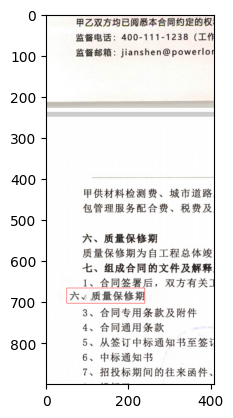

In [3]:
from ultralytics import YOLO
model = YOLO('runs/detect/train29/weights/best.pt')
res = model.predict('123/datasets/error_det/images/train/001321.png')
box = res[0].boxes.xyxy[0]
img = res[0].orig_img
import cv2
cv2.rectangle(img,(int(box[0]),int(box[1])),(int(box[2]),int(box[3])),255,1)
import matplotlib.pyplot as plt
plt.imshow(img)
cv2.imwrite('test.png',img)

In [4]:
import os
def get_image_items(directory, model):
    image_items = []
    for image_name in os.listdir(directory):
        image_path = os.path.join(directory, image_name)
        prediction = model.predict(image_path)
        bounding_boxes = prediction[0].boxes.xyxy.tolist()
        image_item = {
            "id": image_name,
            "region": bounding_boxes
        }
        image_items.append(image_item)
    return image_items

img_dir = '123/datasets/error_det/val_images'
items = get_image_items(img_dir, model)


image 1/1 /mnt/workspace/123/datasets/error_det/val_images/val_1444.JPEG: 640x480 (no detections), 53.0ms
Speed: 1.4ms preprocess, 53.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /mnt/workspace/123/datasets/error_det/val_images/val_2157.png: 640x480 1 error, 12.7ms
Speed: 2.4ms preprocess, 12.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /mnt/workspace/123/datasets/error_det/val_images/val_1163.jpg: 640x320 (no detections), 9.9ms
Speed: 1.0ms preprocess, 9.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 320)

image 1/1 /mnt/workspace/123/datasets/error_det/val_images/val_1719.jpg: 640x480 1 error, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /mnt/workspace/123/datasets/error_det/val_images/val_1852.jpg: 640x640 1 error, 16.1ms
Speed: 2.3ms preprocess, 16.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1

In [7]:
import json
with open('res.json', 'w') as f:
    f.write(json.dumps(items,ensure_ascii=False,indent=4))